# 09wk-mid (ver 1.0) – 풀이업로드

최규빈  
2023-11-01

------------------------------------------------------------------------

1.  True/False를 판단하는 문제는 답만 써도 무방함.
2.  “자료분석” 문제는 “kaggle style score = 50%”, “분석의 논리 = 50%” 의
    배점으로 채점한다.
3.  “자료분석” 유형의 경우 분석의 논리가 매우 우수하거나, 창의적인
    접근법으로 분석을 시도할 경우 가산점을 부여한다. (아이디어
    단계에서도 가산점 부여가능) 가산점은 문항점수의 최대 100%까지
    부여한다.
4.  “연구” 문항의 경우 세부문항을 정확하게 수행한 경우에만 100%의 점수를
    부여하며 이를 어길시 부분점수를 부여하지 않는다. 연구결과의 시각화나
    해석이 우수한 답안은 문항점수의 20%까지 가산점을 부여한다.

------------------------------------------------------------------------

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import sklearn.ensemble
import sklearn.preprocessing 
import sklearn.impute
import sklearn.model_selection

# `1`. True/False (50점)

-   <https://www.kaggle.com/t/7911b05108f642e094ce13a77a5a4723>

> 링크를 `shift + 클릭`하면 새 창으로 열려서 문제 풀기 수월합니다.

**`(1)-(3)`: 아래는 kaggle에서 titanic 데이터를 불러오는 코드이다.**

``` python
df_train=pd.read_csv("/kaggle/input/titanic/train.csv")
df_test=pd.read_csv("/kaggle/input/titanic/test.csv")
```

In [1]:
# !kaggle competitions download -c titanic
# !unzip titanic.zip -d ./titanic
# df_train = pd.read_csv('titanic/train.csv')
# df_test = pd.read_csv('titanic/test.csv')
# !rm titanic.zip
# !rm -rf titanic/

`(1)` 학습을 할 때는 `df_train`만을 이용하며 `df_test`는 전혀 사용하지
않는다.

In [5]:
True

`(2)` `df_train`과 `df_test`의 열의 숫자는 동일하며 행의 숫자만 차이가
난다.

In [6]:
False

`(3)` 여성생존자만 모두 생존한다고 가정하면 `df_train`에서의 accuracy는
78% 이상이다.

In [7]:
True

**`(4)-(7)` 아래는
[모듈4](https://guebin.github.io/MP2023/posts/02wk-004.html)에서 소개한
Alexis Cook의 분석코드이다.**

``` python
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_AlexisCook.csv', index=False)
print("Your submission was successfully saved!")
```

`(4)` `Alexis Cook`의 코드에서는 사용된 설명변수는 \[“Pclass”, “Sex”,
“SibSp”, “Parch”\] 이다.

In [8]:
True

`(5)` `Alexis Cook`의 코드에서는 로지스틱모형을 이용하여 반응변수를
예측하였다.

In [9]:
False

`(6)` `model.fit(X,y)`는 train data를 학습하기 위한 코드이다.

In [10]:
True

`(7)` test data에서의 성능을 확인하기 위해서는 아래의 코드를 사용하면
된다.

``` python
output.score(X_test,y)
```

In [11]:
False

**`(8)-(10)` 아래는
[모듈8](https://guebin.github.io/MP2023/posts/02wk-008.html)에 소개된
코드중 일부이다.**

``` python
from autogluon.tabular import TabularDataset, TabularPredictor

# load data
...
...

# analysis
predictr = TabularPredictor("Survived")
predictr.fit(df_train,presets='best_quality')
(df_train.Survived == predictr.predict(df_train)).mean()
```

`(8)` 위의 코드에서 반응변수는 “Survived”로 설정하였다.

In [12]:
True

`(9)` `predictr.fit(df_train,presets='best_quality')`은 train data를
학습하는 단계이다.

In [13]:
True

`(10)` `(df_train.Survived == predictr.predict(df_train)).mean()`은
모형의 성능을 train data에서 검증하는 단계이다.

In [14]:
True

**`(11)-(14)` 아래는
[모듈11](https://guebin.github.io/MP2023/posts/03wk-011.html)에 제시된
데이터프레임으로 선형모형의 계수값을 표현한 것이다.**

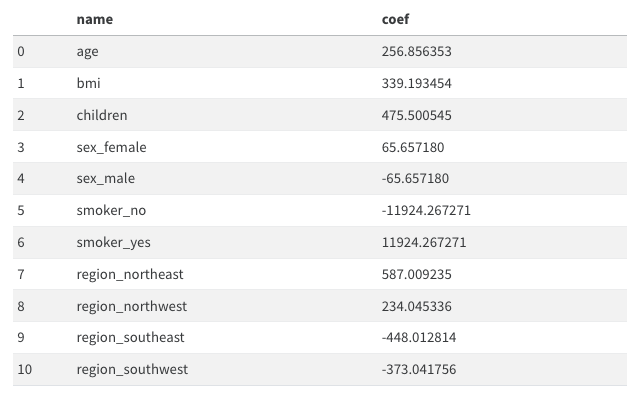

`(11)` 여성은 남성보다 평균적으로 보험료를 65.657180 만큼 더 낸다고
해석할 수 있다.

In [17]:
False # 65.657180*2 만큼 더낸다

`(12)` 나이가 1살 증가하면 보험료가 평균 256.856353 만큼 증가한다고
해석할 수 있다.

In [18]:
True

`(13)` 보험료를 상대적으로 많이 내는 지역과 그렇지 않은 지역이 존재한다.

In [19]:
True

`(14)` 흡연유무는 성별보다 보험료에 미치는 영향이 크다.

In [20]:
True

**`(15)-(19)` 아래는
[모듈13](https://guebin.github.io/MP2023/posts/03wk-013.html)에 대한
설명이다.**

`(15)` `4.분석-실패`에서 아래와 같은 에러메시지가 나오는 이유는 train
data에 결측치가 포함되어 있기 때문이다.

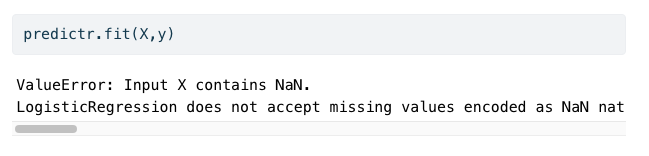

In [21]:
True

`(16)` 결측치가 하나라도 포함된 모든 열을 제거한다면 에러메시지를
피할수는 있겠으나 오버피팅이 발생할 가능성이 있다.

In [22]:
False

`(17)` 따라서 결측치를 하나라도 포함된 모든 열을 제거한뒤 Lasso를 쓰면
오버피팅을 피할 수 있다.

In [23]:
False

`(18)` 결측치가 존재할 경우, 결측치가 있는 열을 제외하고 분석하는 것이
유일한 해결방법은 아니다. 예를들면 결측치를 적당한 값으로 impute한 뒤
분석할 수도 있다.

In [24]:
True

`(19)` train data와 test data에서 결측치가 포함된 행을 모두 제거한 뒤,
train data 를 이용하여 적합을 시키고 test data 에서 예측한뒤 제출하는
것도 가능한 분석방법 중 하나이다. 즉 아래와 같은 의사코드는 가능한
분석방법 중 하나이다.

``` python
df_train = 결측치가 포함된 행이 제거된 train data
df_test = 결측치가 포함된 행이 제거된 test data
X,y = df_train 을 적당히 잘 정리한 자료의 튜플형태 
XX = df_test 를 적당히 잘 정리한 자료
predictr = sklearn.linear_model.LogisticRegression()
predictr.fit(X,y)
submission = predictr.predict(XX)의 값을 적당히 제출용으로 정리하여 만든 df
```

In [28]:
False # test에도 결측치가 존재한다면, 해당방법을 쓸 수 없다. 결측치가 포함된 행을 예측할 수 없기때문

**`(20)-(24)` 아래는
[모듈19](https://guebin.github.io/MP2023/posts/05wk-019.html),
[모듈20](https://guebin.github.io/MP2023/posts/05wk-020.html) 에 대한
설명이다.**

`(20)` `sklearn.preprocessing.MinMaxScaler()`를 이용하여 스케일러를
생성하고 train data에 `.fit_transform()` method를 적용하면 항상 $[0,1]$
사이의 값이 나온다.

In [26]:
True

`(21)` `sklearn.preprocessing.MinMaxScaler()`를 이용하여 스케일러는
`.inverse_transform()` method를 가지고 있으며 이는 변환된 값을 원래로
되돌리는 역할을 한다.

In [29]:
True

`(22)` `sklearn.preprocessing.StandardScaler()`는 데이터의 평균을 0,
표준편차를 1로 만드는 방식으로 조정한다.

In [30]:
True

`(23)` 만약에 train data와 test data로 나누어진 상황에서 스케일러를
이용하여 데이터를 변환하려면 아래와 같은 순서를 따르는 것이 하나의
방법이다.

1.  적당한 scaler 생성이후 train data 를 입력으로 넣고
    `.fit_transform()` method 사용
2.  1과 동일한 scaler에 test data 를 입력으로 넣고 `.transform()` method
    사용

In [31]:
True

`(24)` `(23)`과 동일한 상황에서 아래와 같은 변환도 해법이 될 수 있다.

1.  적당한 scaler 생성이후 train data, test data를 합쳐서 입력으로 넣고
    `.fit_transform()` method 사용

In [32]:
False

**`(25)-(26)` 아래는
[모듈21](https://guebin.github.io/MP2023/posts/05wk-021.html) 에 대한
설명이다.**

`(25)` 밸런스게임을 통하여 많은 변수를 모을수록 train data 에 대한
score를 올릴 수 있다.

In [33]:
True

`(26)` 이 모듈의 예시는 불필요한 변수의 추가가 오히려 학습에 방해되어
test score를 낮추는 현상이 생길 수 있음을 시사한다.

In [34]:
True

**`(27)-(33)` 아래는
[모듈22](https://guebin.github.io/MP2023/posts/06wk-022.html) 에 대한
설명이다.**

`(27)` 이 모듈의 데이터에서 `toeic`과 `toeic0`의 상관계수값은 매우 높게
나올 것이다.

In [35]:
True

`(28)` 이 모듈의 데이터에서 모든변수를 넣고
적합한다면,`toeic, toeic0, ... ,toeic499`에 적합된 계수값의 합은 `0.01`
정도의 값을 가진다.

In [36]:
True

`(29)` 이 모듈의 데이터에서 `gpa`와 `toeic`만을 남기고 나머지 변수를
제거한뒤 돌리면 test score가 향상된다.

In [37]:
True

`(30)` 즉 이 모듈의 데이터는 변수를 제거할수록 test score가 향상된다.
예를들면 `gpa`를 제거하여도 test score가 향상된다.

In [38]:
False

`(31)` 이 예제에서 train score는 모든 데이터를 사용하여 적합하였을 경우
가장 높게 나타난다.

In [42]:
True # Train score는 높게나온다. Test score가 문제여서 그렇지..

`(32)` `toeic`, `toeic1`부터 `toeic499`까지의 변수들은 모두
`employment_score`와 높은 상관계수를 보인다.

In [41]:
True

`(33)` 모듈22에 소개된 현상을 다중공선성이라고 말하며 이때는 계수값의
해석이 용이하지 않다.

In [43]:
True

**`(34)-(38)` 아래는 다중공선성과 Rigde, Lasso에 대한 종합적인
설명이다.**

`(34)` 다중공선성이 발생할 경우 올바른 변수선택으로 언제나 문제를 해결할
수 있다.

In [44]:
False

`(35)` 다중공선성이 발생할 경우 ${\bf X}$의 correlation matrix는
단위행렬에 가깝게 나온다.

In [45]:
False

`(36)` 다중공선성이 발생한다면 Ridge, Lasso와 같은 방법을 이용하여
해결할 수 있다.

In [46]:
True

`(37)` 관측치의 수가 매우커진다면 (즉 데이터프레임에서 행의 숫자가 매우
커진다면) 다중공선성 문제가 심화될 가능성이 있다.

In [47]:
False

`(38)` 다중공선성을 아래와 같은 시각화 코드로 진단할 수 있는 경우가
있다.

``` python
sns.heatmap(df_train.corr(),annot=True)
```

In [48]:
True

**`(39)-(42)` 아래는
[모듈23](https://guebin.github.io/MP2023/posts/06wk-023.html) 에 대한
설명이다.**

`(39)` `toeic`, `toiec0`, …, `toeic499` 에 대응하는 계수값의 합은
$\alpha$ 와 관련없이 항상 일정하다.

In [49]:
False

`(40)` 이 모듈에서 큰 $\alpha$는 토익계수들의 값을 점점 비슷하게 만들어
주는 효과가 있다.

In [50]:
True

`(41)` `toeic`, `toiec0`, …, `toeic499` 에 대응하는 계수값들의 분산은
$\alpha$가 커짐에 따라 점점 작아진다.

In [51]:
True

`(42)` $\alpha$를 매우 잘 선택한다면 `모듈23-4.True` 에서 소개된 바와
같이 적절한 변수선택을 할 수 있다.

In [52]:
False

**`(43)-(44)` 아래는
[모듈25](https://guebin.github.io/MP2023/posts/06wk-025.html) 에 대한
설명이다.**

`(43)` $\alpha$가 커질수록 0이 아닌 계수값의 수는 점점 증가한다.

In [53]:
False

`(44)` Lasso를 사용하면, 토익과 유사한 변수의 수가 증가할수록
test_score가 좋아진다.

In [54]:
False

**`(45)-(47)` 아래는
[모듈27](https://guebin.github.io/MP2023/posts/06wk-027.html) 에 대한
설명이다.**

`(45)` 강의교재에 소개된 아래의 그림은 train score 보다 test score 가
낮은 상황이다.

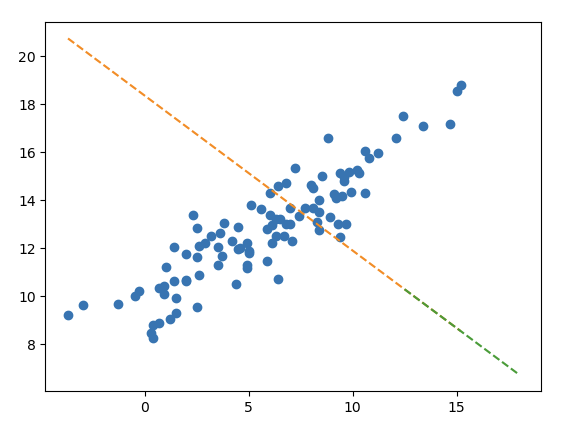

In [55]:
True

`(46)` 하지만 이러한 적합결과가 오버피팅이라고 보기는 어렵다.

In [56]:
True

`(47)` 아웃라이어를 제거한다면 선형모형의 `df_train`, `df_test`에 대한
score가 모두 상승할 것이다.

In [57]:
True

**`(48)-(50)` 아래는
[모듈29](https://guebin.github.io/MP2023/posts/06wk-029.html)에 대한
설명이다.**

`(48)` `모듈29, 4.분석`에 소개된 아래와 같은 모형은

-   ${\bf X}$: `Supplement`, `Exercise`, `Supplement` $\times$
    `Exercise`
-   ${\bf y}$: `Weight_Loss`

운동을 했으며, 보조제를 사용한 경우에 발생하는 추가적인 효과를 고려할 수
있다.

In [58]:
True

`(49)` 이처럼 두 종류 이상의 범주형 범수가 존재하는 경우 범주형 범수간의
교호작용을 항상 고려해야 모형의 성능을 올릴 수 있다.

In [59]:
False

`(50)` 실제로 교호작용이 있지만 이를 고려하지 않아서 모형의 성능이
떨어지는 경우는 언터피팅의 일종으로 볼 수 있다.

In [60]:
True

# `2`. 자료분석 (30점)

`(1)` 아래의 자료를 해석하고 세부지침에 맞추어 분석하라.

In [238]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/icesales_test.csv')

**세부지침**

1.  반응변수 ${\bf y}$를 `sales`로 설정하고 나머지는 설명변수로
    설정하라.
2.  `df_test`에 `sales`에 대한 예측값을 포함하는 열을 추가하라.

`(풀이)`

In [239]:
df_train.head()

In [240]:
# step1 
X = pd.get_dummies(df_train[['temp','type']],drop_first=True)
XX = pd.get_dummies(df_test[['temp','type']],drop_first=True)
y = df_train['sales']
# step2 
predictr = sklearn.linear_model.LinearRegression()
# step3 
predictr.fit(X,y) 
# step4 
yhat = predictr.predict(XX) 
df_test['sales'] = yhat

`(더 좋은 풀이)`

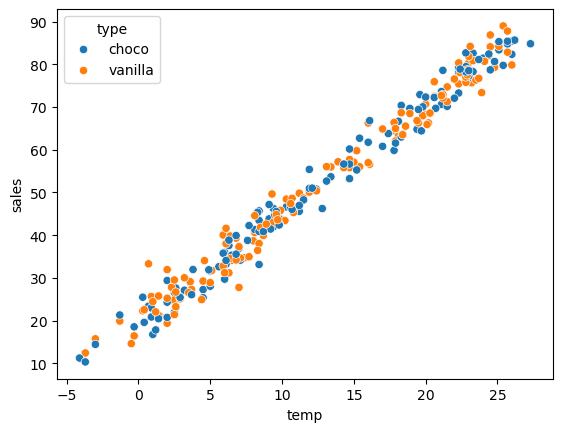

In [241]:
sns.scatterplot(df_train, x='temp', y='sales', hue='type')

시각화를 해보고 `type`은 y를 예측할때 도움이 되지 않음을 파악하고
`type`을 제외하고 예측하면 가산점.

`(2)` 아래의 자료를 해석하고 세부지침에 맞추어 분석하라.

In [266]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_test.csv')

**세부지침**

1.  반응변수 ${\bf y}$를 `height`로 설정하고 나머지는 설명변수로
    설정하라.
2.  `df_test`에 `height`에 대한 예측값을 포함하는 열을 추가하라.

`(풀이)`

In [267]:
df_train.head()

In [298]:
# step1 
## 데이터분리
X = pd.get_dummies(df_train[['weight','sex']],drop_first=True)
XX = pd.get_dummies(df_test[['weight','sex']],drop_first=True)
y = df_train['height']
## 결측치처리
imputer = sklearn.impute.SimpleImputer()
X[['weight']] = imputer.fit_transform(X[['weight']])
XX[['weight']] = imputer.transform(XX[['weight']])
## 교호작용고려 
X['interaction'] = X['weight']*X['sex_male']
XX['interaction'] = XX['weight']*XX['sex_male']
# step2 
predictr = sklearn.linear_model.LinearRegression()
# step3 
predictr.fit(X,y) 
# step4 
yhat = predictr.predict(XX) 
df_test['height'] = predictr.predict(XX)

적합결과 시각화 (train)

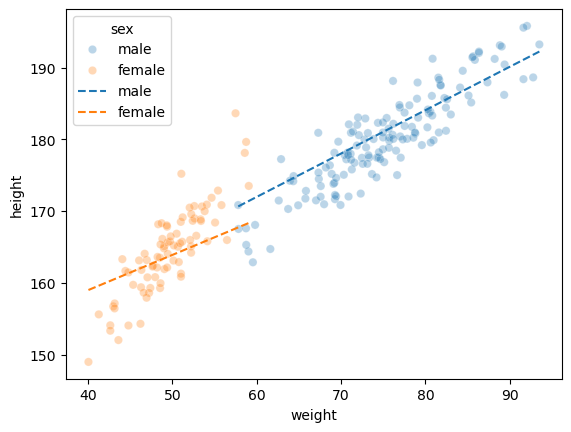

In [299]:
sns.scatterplot(df_train, x='weight',y='height',hue='sex',alpha=0.3)
sns.lineplot(df_train,x='weight',y=predictr.predict(X),hue='sex',linestyle='--')

> 이정도만 풀어도 만점으로 인정

`(더 좋은 풀이)`

남여의 몸무게 평균이 다르므로 그룹별로 몸무게를 예측하는것이 더
올바르다.

In [275]:
# step1 
## 데이터분리
X = pd.get_dummies(df_train[['weight','sex']],drop_first=True)*1.0
XX = pd.get_dummies(df_test[['weight','sex']],drop_first=True)*1.0
y = df_train['height']
## 결측치처리
# -- male 
imputer_male = sklearn.impute.SimpleImputer()
X[X.sex_male==1] = imputer_male.fit_transform(X[X.sex_male==1])
XX[XX.sex_male==1] = imputer_male.transform(XX[XX.sex_male==1])
# -- female 
imputer_female = sklearn.impute.SimpleImputer()
X[X.sex_male==0] = imputer_female.fit_transform(X[X.sex_male==0])
XX[XX.sex_male==0] = imputer_female.fit_transform(XX[XX.sex_male==0])
## 교호작용고려 
X['interaction'] = X['weight']*X['sex_male']
XX['interaction'] = XX['weight']*XX['sex_male']
# step2 
predictr = sklearn.linear_model.LinearRegression()
# step3 
predictr.fit(X,y) 
# step4 
yhat = predictr.predict(XX) 
df_test['height'] = predictr.predict(XX)

적합결과 시각화 (train)

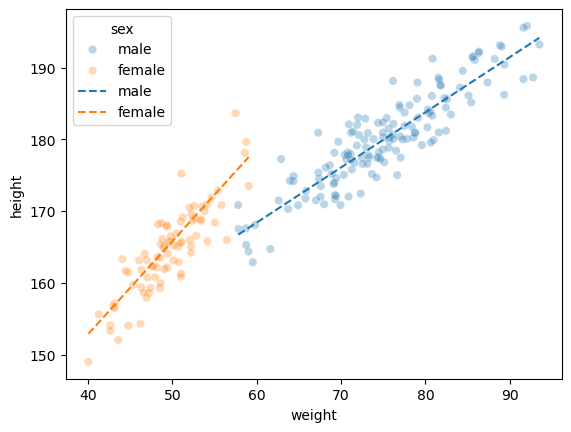

In [294]:
sns.scatterplot(df_train, x='weight',y='height',hue='sex',alpha=0.3)
sns.lineplot(df_train,x='weight',y=predictr.predict(X),hue='sex',linestyle='--')

`(3)` 아래의 자료를 해석하고 세부지침에 맞추어 분석하라.

In [301]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/synthetic_test.csv')

**세부지침**

1.  반응변수 ${\bf y}$를 `y`로 설정하고 나머지 `X1`,`X2`,`X3`,`X4`는
    설명변수로 설정하라.
2.  `df_test`에 `y`에 대한 예측값을 포함하는 열을 추가하라.

`(풀이)`

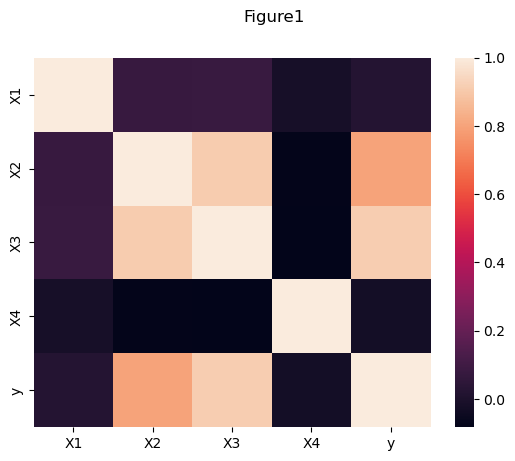

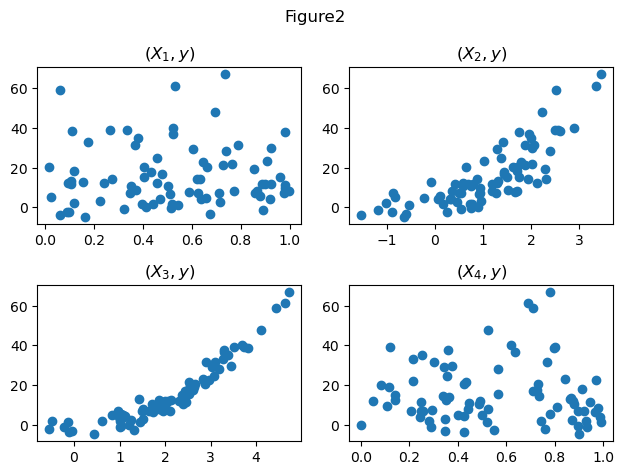

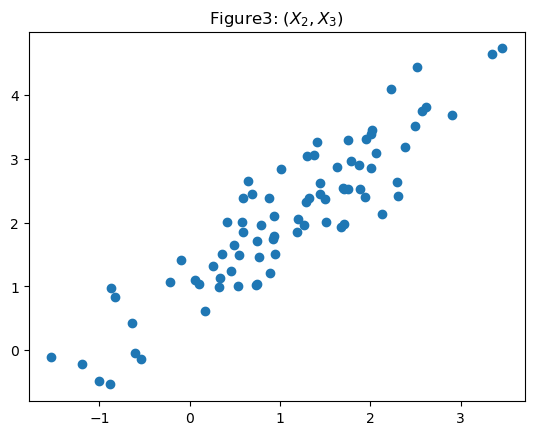

In [326]:
# 생성된 데이터 시각화
sns.heatmap(df_train.corr())
fig = plt.gcf()
fig.suptitle("Figure1")

fig,ax = plt.subplots(2, 2)
ax[0,0].plot(df_train.X1, df_train.y,'o')
ax[0,0].set_title(r'$(X_1,y)$')
ax[0,1].plot(df_train.X2, df_train.y,'o')
ax[0,1].set_title(r'$(X_2,y)$')
ax[1,0].plot(df_train.X3, df_train.y,'o')
ax[1,0].set_title(r'$(X_3,y)$')
ax[1,1].plot(df_train.X4, df_train.y,'o')
ax[1,1].set_title(r'$(X_4,y)$')
fig.suptitle("Figure2")
fig.tight_layout()


fig, ax = plt.subplots()
ax.plot(df_train.X2, df_train.X3,'o')
ax.set_title(r'Figure3: $(X_2,X_3)$')
#fig.suptitle("Figure3")

`-` $(X_1,X_4)$은 $y$와 관련이 없으므로 제외한다. (Figure1, Figure2)

`-` $(X_2,X_3)$은 모두 $y$와 관련이 있으나 둘 사이의 선형관계가
존재하므로 공선성의 관계가 있다. (Figure1, Figure3) 따라서 둘중하나를
제거하고 분석하거나, Lasso/Ridge중 하나를 쓰는것이 합리적으로 보인다. 본
풀이에서는 둘 중 하나를 제거하고 분석하도록 하겠다.

In [354]:
# step1 
X = df_train[['X3']]
y = df_train['y']
XX = df_test[['X3']]
# step2 
predictr = sklearn.linear_model.LinearRegression()
# step3 
predictr.fit(X,y)
# step4 
df_test['y'] = predictr.predict(XX)

`-` 적합결과 시각화

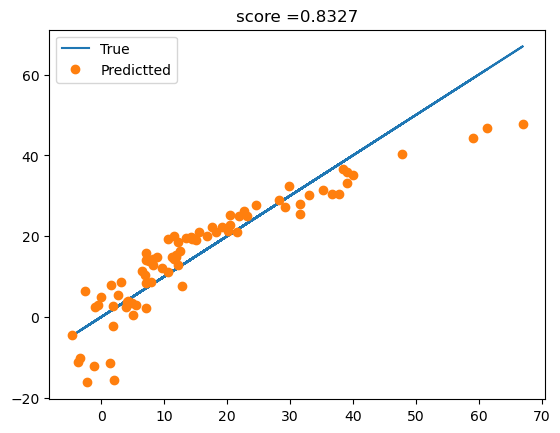

In [355]:
plt.plot(df_train['y'],df_train['y'],'-',label='True')
plt.plot(df_train['y'],predictr.predict(X),'o',label='Predictted')
plt.title(f'score ={predictr.score(X,y):.4f}')
plt.legend()

`(더 좋은 풀이) -- 1`

$(X_3,y)$ 사이에 비 선형성이 있어보이므로, 의사결정나무를 이용하여
적합하여 보자.

In [393]:
# step1 
X = df_train[['X3']]
y = df_train['y']
XX = df_test[['X3']]
# step2 
predictr = sklearn.tree.DecisionTreeRegressor()
# step3 
predictr.fit(X,y)
# step4 
df_test['y'] = predictr.predict(XX)

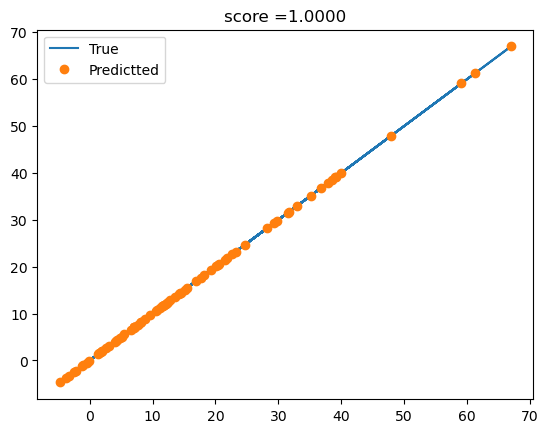

In [394]:
plt.plot(df_train['y'],df_train['y'],'-',label='True')
plt.plot(df_train['y'],predictr.predict(X),'o',label='Predictted')
plt.title(f'score ={predictr.score(X,y):.4f}')
plt.legend()

-   오버핏이 염려되긴 하지만 해봄직하다.

`(더 좋은 풀이) -- 2`

$(X_3,y)$ 사이에 비 선형성이 있어보이므로, $(X_3)^2$을 모델링하여
적합하자. (배운내용X, 이러한 방법을 ploynomial regression 혹은
자기자신과의 교호작용을 고려한 모형이라고 한다.)

In [395]:
# step1 
X = df_train.assign(X3_square = df_train['X3']**2)[['X3','X3_square']]
y = df_train['y']
XX = df_test.assign(X3_square = df_test['X3']**2)[['X3','X3_square']]
#---#
# step2 
predictr = sklearn.linear_model.LinearRegression()
# step3 
predictr.fit(X,y)
# step4 
df_test['y'] = predictr.predict(XX)

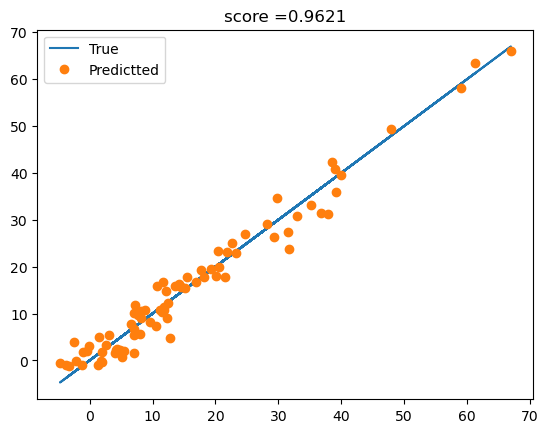

In [396]:
plt.plot(df_train['y'],df_train['y'],'-',label='True')
plt.plot(df_train['y'],predictr.predict(X),'o',label='Predictted')
plt.title(f'score ={predictr.score(X,y):.4f}')
plt.legend()

-   사실 이게 트루모델임..

# `3`. 연구 (20점)

아래의 코드를 이용하여 자료를 불러오라.

In [398]:
np.random.seed(42)
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)

아래의 절차에 따라 자료를 연구하라. 결과를 해석하라.

1.  종속변수 ${\bf y}$를 `employment_score`로 설정하고 나머지는
    설명변수로 설정하라.
2.  `sklearn.linear_model.Ridge`를 이용하여
    $\alpha = [10^1, 10^{1.5}, 10^2, 10^{2.5}, \dots, 10^{9}]$에 대해
    predictor를 생성하라.
3.  $\alpha$의 변화에 따른 train score 와 test score 의 변화를
    시각화하라.
4.  $\alpha$에 변화에 따른 `predictor`가 학습한 coefficient값
    (`predictor.coef_`) 들의 분산변화와 L2-penalty를 시각화하라.

`(풀이)` – 생략, 강의노트 참고

------------------------------------------------------------------------

jupyter: kernelspec: display_name: Python 3 (ipykernel) language: python
name: python3 language_info: codemirror_mode: name: ipython version: 3
file_extension: .py mimetype: text/x-python name: python
nbconvert_exporter: python pygments_lexer: ipython3 version: 3.10.13

------------------------------------------------------------------------